Missing values per column:
2016    0
2015    0
2014    0
2013    0
2012    0
2011    0
2010    0
2009    0
2008    0
2007    0
2006    0
2005    0
2004    0
2003    0
2002    0
2001    0
2000    0
1999    0
1998    0
1997    0
1996    0
1995    0
1994    0
1993    0
1992    0
1991    0
1990    0
1989    0
1988    0
1987    0
1986    0
1985    0
1984    0
1983    0
1982    0
1981    0
1980    0
1979    0
1978    0
1977    0
1976    0
1975    0
dtype: int64


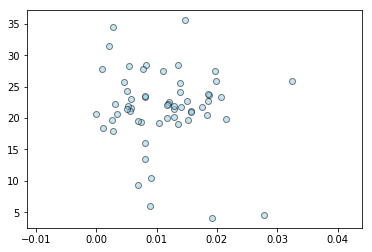

In [26]:
import pandas as pd
import numpy as np

obesity_df = pd.read_csv('Resources/WHO_Obesity_Data_Global.csv')
obesity_df

# Clean up on aisle 3
obesity_df.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
obesity_df.set_index(obesity_df['Country'], inplace=True)
obesity_df = obesity_df.iloc[3:]
obesity_df.drop(columns=['Country'], inplace=True)
obesity_df.head()

# More clean up but with loop this time...so talented
column_list = obesity_df.columns
for column in column_list:
    if '.' in column:
        obesity_df.drop(columns=[column], inplace=True)
obesity_df

# Now for a bit of Regex
obesity_df = obesity_df.replace(to_replace='\[.*$', value='', regex=True)
obesity_df

# Check for null values in the dataset
def num_missing(x):
    return sum(x.isnull())
# Apply Per Column
print ("Missing values per column:")
print (obesity_df.apply(num_missing, axis=0))

# Check the dtypes
obesity_df.dtypes

# Convert dtypes into floats
for column in obesity_df:
    obesity_df[column] = pd.to_numeric(obesity_df[column], errors='coerce')
    obesity_df[column] = obesity_df[column].round(3)
    obesity_df[column].dropna(axis=0, inplace=True)
    obesity_df[column] = obesity_df[column].astype(float)

obesity_df['2015'].describe()

# Analysis of Obesity and Suicide
# Ensure all countries are included in analysis
oo = obesity_df['2015']
obesity_top_50 = oo.to_frame()
obesity_top_50.rename(index={'United States of America':'United States', 'Czechia':'Czech Republic'}, inplace=True)

suicide_df = pd.read_csv('Suicide_Percentage_Breakdown.csv')

suicide_df.rename(columns={'country':'Country'}, inplace=True)
suicide_df.set_index('Country')
suicide_df.head(50)

# Combine dataframes on Country axis
suicide_obesity_df = suicide_df.join(obesity_top_50, on='Country')
suicide_obesity_df.dropna(inplace=True)
suicide_obesity_df.head(50)

suicide_obesity_df['2015'].describe()

suicide_2015 = pd.read_csv('Suicide_Percentage_Breakdown_2015.csv')

suicide_2015.rename(columns={'country':'Country'}, inplace=True)
suicide_2015.sort_values(by=['Percentage of Suicide'],ascending=False, inplace=True)
suicide_2015.set_index('Country')

suicide_obesity_2015 = suicide_2015.join(obesity_top_50, on='Country')
suicide_obesity_2015.set_index('Country', inplace=True)

# Plot scatter graph showing relationship: null hypothesis - there is no relationship
import matplotlib.pyplot as plt
plt.scatter(y=suicide_obesity_2015['2015'], x=suicide_obesity_2015['Percentage of Suicide'], color='skyblue', alpha=0.5, edgecolor='black')

In [27]:
suicide_obesity_2015

,Percentage of Suicide,2015
Country,,
Lithuania,0.032535,26.0
Republic of Korea,0.027757,4.5
Slovenia,0.021590,19.8
Latvia,0.020634,23.3
Hungary,0.019895,25.9
Uruguay,0.019744,27.5
Japan,0.019183,4.1
Ukraine,0.018773,23.7
Russian Federation,0.018561,22.8


In [22]:
gdp_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
gdp_df.rename(columns={'COUNTRY':'country'}, inplace=True)
gdp_df.set_index('country', inplace=True)
suicide_obesity_2015 = suicide_obesity_2015.join(gdp_df)
suicide_obesity_2015.dropna(inplace=True)

In [24]:
suicide_obesity_2015

,Percentage of Suicide,2015,GDP (BILLIONS),CODE
Country,,,,
Lithuania,0.032535,26.0,48.72,LTU
Slovenia,0.021590,19.8,49.93,SVN
Latvia,0.020634,23.3,32.82,LVA
Hungary,0.019895,25.9,129.70,HUN
Uruguay,0.019744,27.5,55.60,URY
Japan,0.019183,4.1,4770.00,JPN
Ukraine,0.018773,23.7,134.90,UKR
Croatia,0.018467,23.9,57.18,HRV
Kazakhstan,0.018355,20.5,225.60,KAZ


In [31]:
# Plot scatter plot showing relationship between obesity and suicide
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(y=suicide_obesity_2015['Percentage of Suicide'],x=suicide_obesity_2015['2015'], mode='markers'))

fig.update_layout(title='Relationship between Obesity Rates and Suicides per Country 2015', xaxis_title='Obesity Rates', yaxis_title='Percentage of Suicides')
fig.show()

In [32]:
fig.write_image("images/Relationship_between_Obesity_Rates_and_Suicides_per_Country_2015.png")